# Week 6: Predictive Modeling

## Rob Pike's 5 Rules of Programming

These are the rules to know by heart when you are starting to write any code:

1. You can't tell where a program is going to spend its time. Bottlenecks occur in surprising places, so don't try to second guess and put in a speed hack until you've proven that's where the bottleneck is.
1. Measure. Don't tune for speed until you've measured, and even then don't unless one part of the code overwhelms the rest.
1. Fancy algorithms are slow when n is small, and n is usually small. Fancy algorithms have big constants. Until you know that n is frequently going to be big, don't get fancy. (Even if n does get big, use Rule 2 first.)
1. Fancy algorithms are buggier than simple ones, and they're much harder to implement. Use simple algorithms as well as simple data structures.
1. Data dominates. If you've chosen the right data structures and organized things well, the algorithms will almost always be self-evident. Data structures, not algorithms, are central to programming.

## Predictive Modeling

Until today, we learnt the parts of the basic recipe for applying supervised ML models:

1. Choose a class of model
1. Optimize model hyperparameters
1. Fit the model to the training data
1. Use the model to predict labels for new data

Now, we are going to put all this together to build a predictive model to use in real-life scenarios.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn context and style.
sns.set_style('whitegrid')
sns.set_context('talk')

For this assignment, we will use California housing dataset.

In [2]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()
X, y = dataset.data, dataset.target

print(f'There are {X.shape[0]:d} datapoints with {X.shape[1]:d} features.')
print(f'Features are {", ".join(dataset.feature_names)}.')

There are 20640 datapoints with 8 features.
Features are MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude.


In [8]:
dataset["DESCR"]

'California housing dataset.\n\nThe original database is available from StatLib\n\n    http://lib.stat.cmu.edu/datasets/\n\nThe data contains 20,640 observations on 9 variables.\n\nThis dataset contains the average house value as target variable\nand the following input variables (features): average income,\nhousing average age, average rooms, average bedrooms, population,\naverage occupation, latitude, and longitude in that order.\n\nReferences\n----------\n\nPace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,\nStatistics and Probability Letters, 33 (1997) 291-297.\n\n'

### Q1. Explore the dataset to understand how data is structured. Explain your observations. (Hint: similar to Week 1 Assignment)

In [5]:
dataframe = pd.DataFrame(X, columns = dataset["feature_names"])
dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [10]:
dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


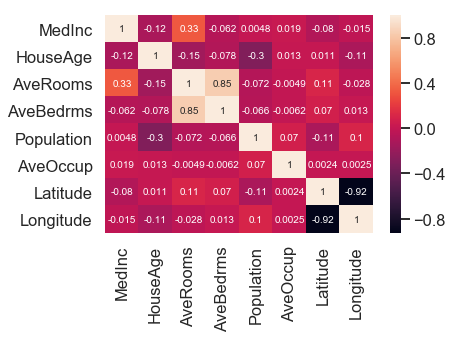

In [11]:
corr = dataframe.corr()
sns.heatmap(corr,annot=True)

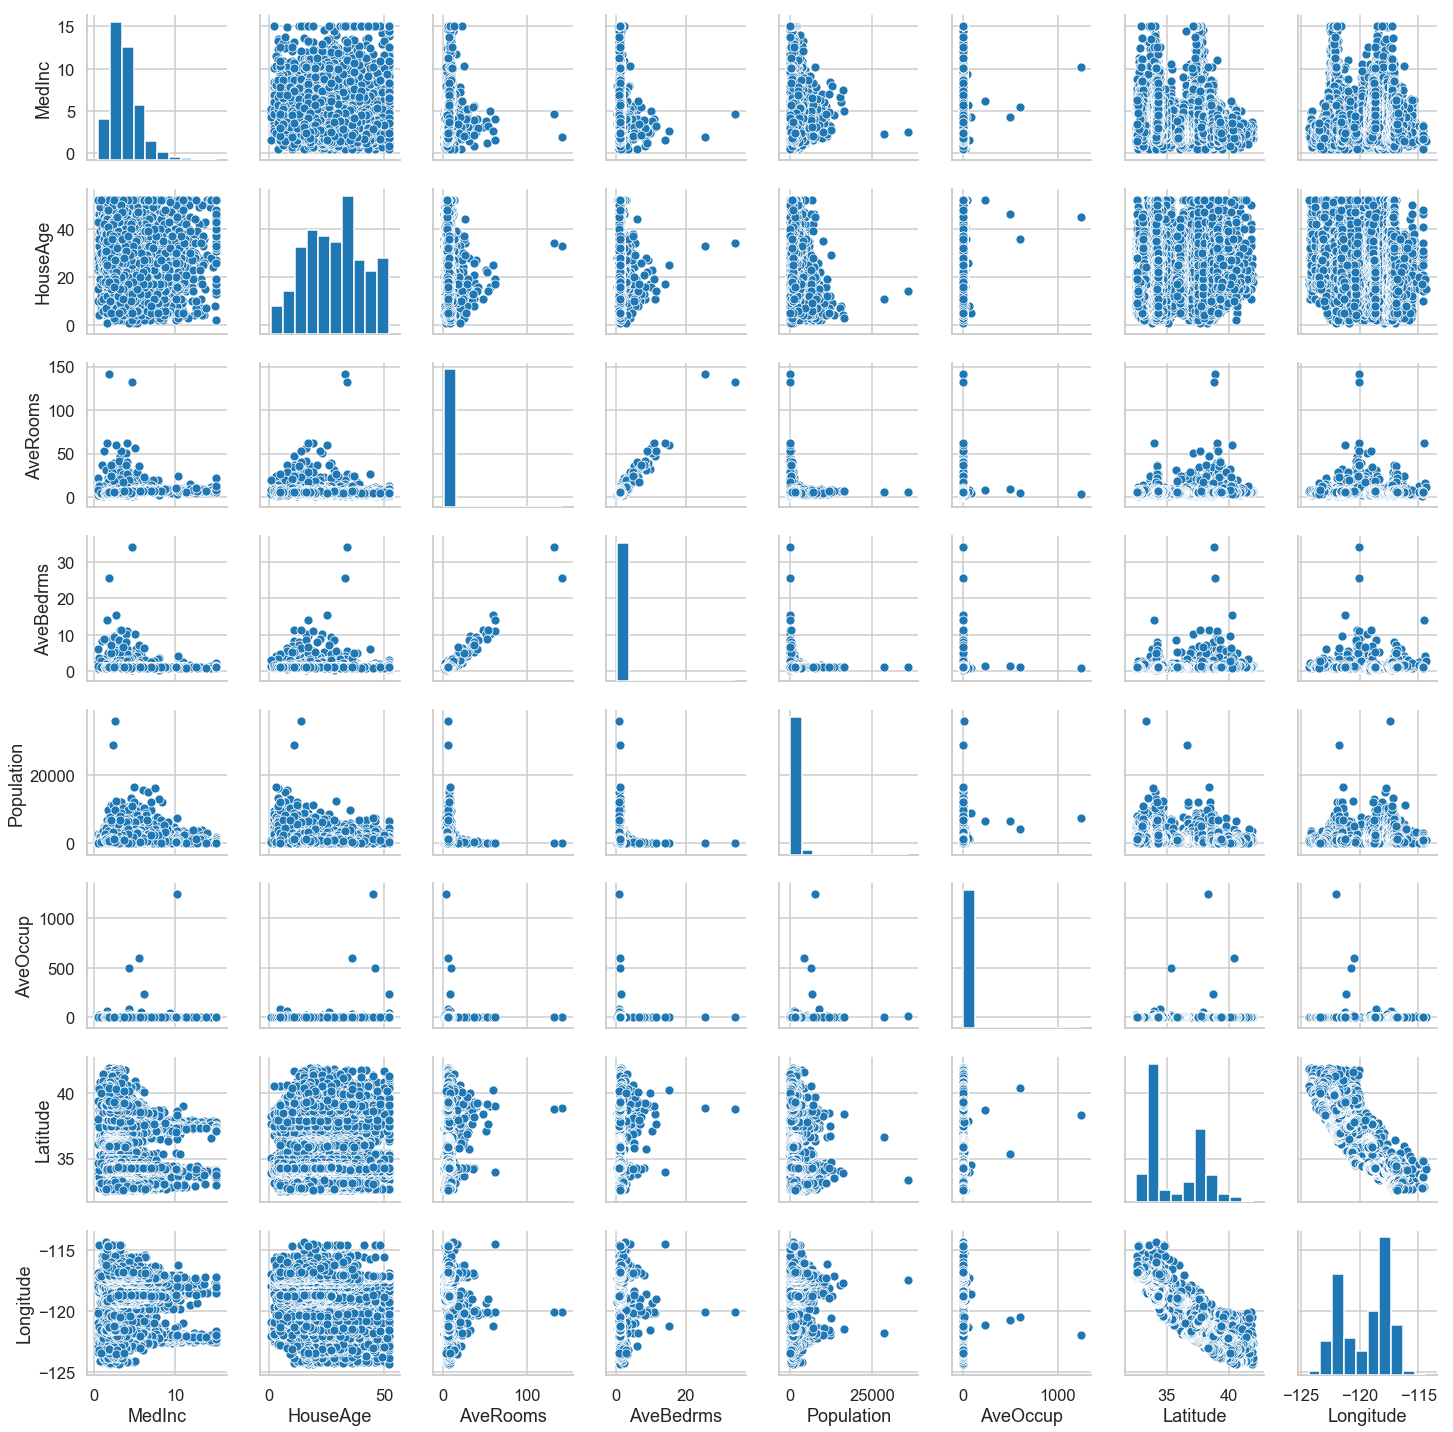

In [12]:
sns.pairplot(dataframe)

Notice in the above plot:
    
In this dataset, it looks like columns **Medinc/AveRooms** and **AveRooms/AveBedrms** have some **positive** relationship

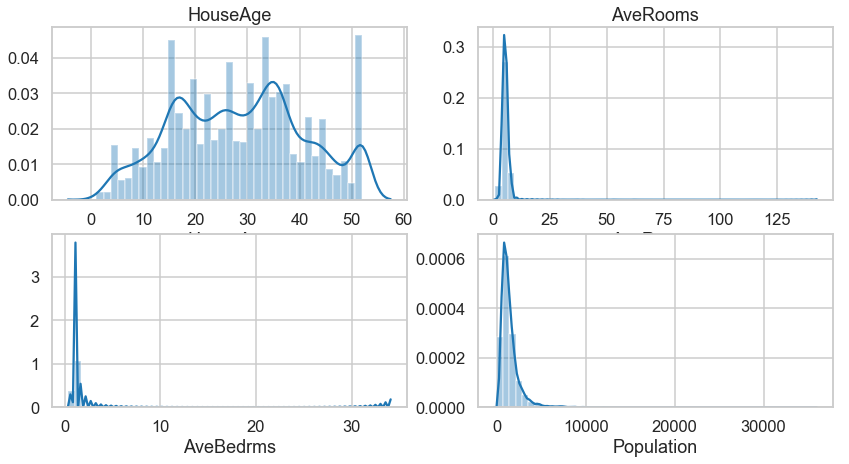

In [13]:
plt.figure(figsize=(14, 7))

plt.subplot(2,2,1)
sns.distplot(dataframe["HouseAge"])
plt.title("HouseAge")

plt.subplot(2,2,2)
sns.distplot(dataframe["AveRooms"])
plt.title("AveRooms")

plt.subplot(2,2,3)
sns.distplot(dataframe["AveBedrms"])

plt.subplot(2,2,4)
sns.distplot(dataframe["Population"])

Notice in the above plot:
    
Some of the **Houses** which are really old are around 50 years old. The majority of the houses are **18 - 40 years old** and the average is 29 years old. The **average bedrooms** are about **1** room and the **average rooms** are **5** rooms. The average population is 1425.

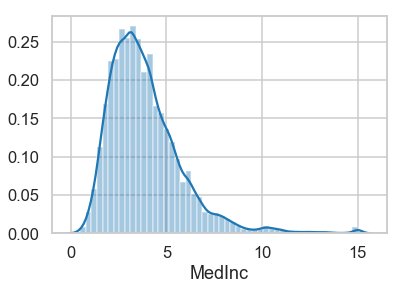

In [14]:
sns.distplot(dataframe["MedInc"])

Notice in the above plot:

The average median income is 3.87. In the plot, we can see that we have some outliers (people who have much higher median income)

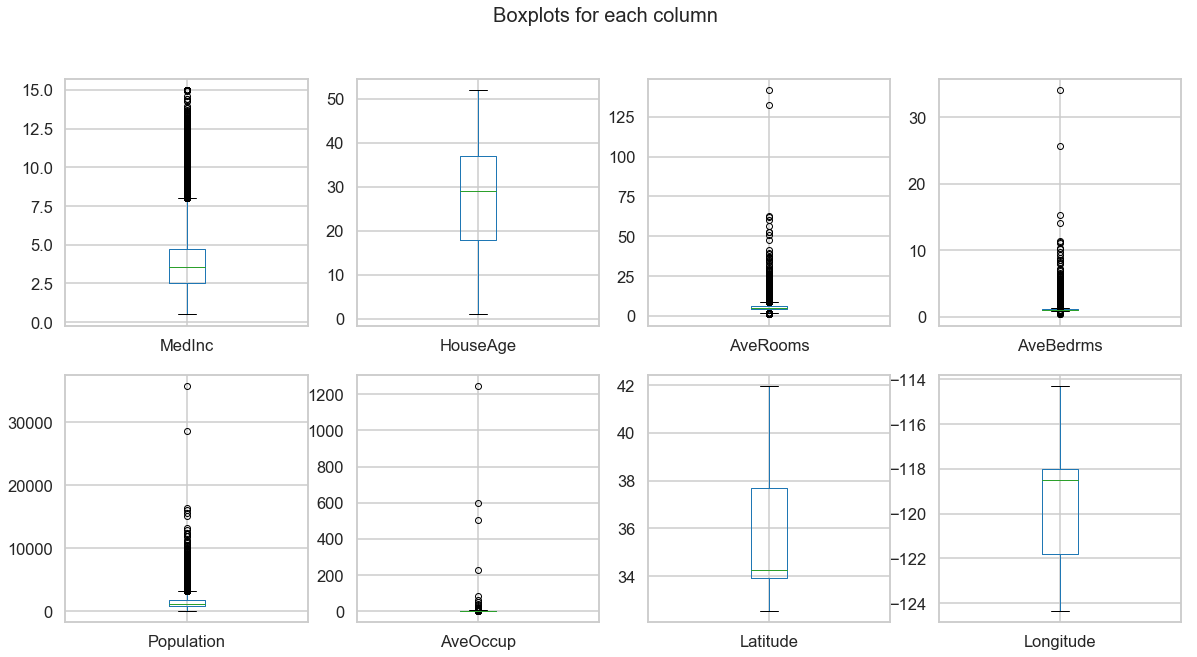

In [15]:
num=0
plt.figure(figsize=(20, 10))
plt.suptitle("Boxplots for each column", fontsize=20)
    
for column in dataframe:
    num+=1
    plt.subplot(2,4, num)
    dataframe.boxplot([column])

Notice in the above plot:
    
Some of the columns have many extremely high values (might be the outliers).

In [6]:
def Age(age):
    
    if 10<=age<20:
        return 0
    elif 21<=age<40:
        return 1
    else:
        return 2

In [7]:
New_houseAge = pd.DataFrame(dataframe["HouseAge"].apply(Age))
New_houseAge.columns = ["new_HouseAge"]

In [8]:
new_dataframe = pd.concat([New_houseAge, dataframe], axis=1)
new_dataframe.drop("HouseAge", axis=1, inplace= True)

In [9]:
new_dataframe.groupby("new_HouseAge").mean()

,MedInc,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
new_HouseAge,,,,,,,
0,4.036967,5.929114,1.156508,1678.364360,2.871863,35.872173,-119.536197
1,3.829810,5.302291,1.079141,1358.475160,3.075987,35.432519,-119.433743
2,3.814085,5.265353,1.081152,1347.731519,3.212613,35.789687,-119.827366


After I divide the house age to three subsets, we can see that it's about the same amount of bedrooms, rooms even though the average population is slightly different. When the houses are younger, the mean population is higher. Moreover, when houses are younger, the average median income is also higher. 

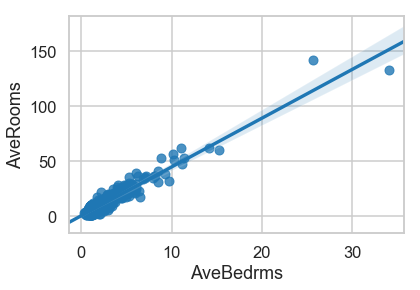

In [13]:
sns.regplot(x="AveBedrms", y="AveRooms", data = dataframe)

This plot makes sense that AveBedrms and AveRooms have a high positive correlation.

### Q2. In a real-life model, we split dataset into two: cross-validation and test datasets. Reserve 20% of your dataset for final performance testing.

In [19]:
from sklearn.model_selection import train_test_split

In [37]:
X = dataframe
y = y

X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Q3. Using your cross-validation dataset, run parameter searches with 3-fold cross-validation on DecisionTreeRegressor and ElasticNet to find the best model. You need to decide on which parameters to search and which ranges to search (Check Week 5 Assignment). Do not select more than two parameters per algorithm. Make sure you select the correct [scoring function](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) as well. Explain your selections.

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import ElasticNet

Way 1:

In [141]:
import warnings
warnings.filterwarnings("ignore")

max_depths = np.arange(1, X.shape[1] + 1)
alphas = np.logspace(-5, 1, 10)
l1_ratios = np.linspace(0, 1, 10)

param_grid = {'max_depth': max_depths,'max_features': max_depths}
param_grid1 = {'alpha': alphas,'l1_ratio': l1_ratios}

param_grids = [param_grid , param_grid1]
models = [DecisionTreeRegressor, ElasticNet] 

for model, param in zip(models, param_grids):

    grid = GridSearchCV(model(), param, cv = 3, scoring= "r2")
    grid.fit(X_cv, y_cv)
    
    print(model.__name__, grid.best_params_, grid.best_score_)

DecisionTreeRegressor {'max_depth': 8, 'max_features': 6} 0.6791917137823116
ElasticNet {'alpha': 0.46415888336127725, 'l1_ratio': 0.4444444444444444} 0.49718843865974827


Way 2:

In [82]:
max_depths = np.arange(1, X.shape[1] + 1)

param_grid = {'max_depth': max_depths,
              'max_features': max_depths}

grid = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=3, scoring="r2")
grid.fit(X_cv, y_cv)

GridSearchCV(cv=3, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8]), 'max_features': array([1, 2, 3, 4, 5, 6, 7, 8])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [83]:
print("The best values for paramaters:", grid.best_params_)
print("The R2:", round(grid.best_score_,2))

The best values for paramaters: {'max_depth': 8, 'max_features': 6}
The R2: 0.68


In [138]:
import warnings
warnings.filterwarnings("ignore")

alphas = np.logspace(-5, 1, 10)
l1_ratios = np.linspace(0, 1, 10)

param_grid = {'alpha': alphas,
              'l1_ratio': l1_ratios}

grid = GridSearchCV(ElasticNet(), param_grid, cv = 3, scoring= "r2")
grid.fit(X_cv, y_cv)

GridSearchCV(cv=3, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-05, 4.64159e-05, 2.15443e-04, 1.00000e-03, 4.64159e-03,
       2.15443e-02, 1.00000e-01, 4.64159e-01, 2.15443e+00, 1.00000e+01]), 'l1_ratio': array([0.     , 0.11111, 0.22222, 0.33333, 0.44444, 0.55556, 0.66667,
       0.77778, 0.88889, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [139]:
print("The best values for paramaters:", grid.best_params_)
print("The R2:", round(grid.best_score_,2))

The best values for paramaters: {'alpha': 0.46415888336127725, 'l1_ratio': 0.4444444444444444}
The R2: 0.5


For DecisionTreeRegressor, I choose parameters **max_depth** and **max_features**.

For ElasticNet, I choose parameters **alpha** and **l1_ratios**.

After I run 2 models, **DecisionTreeRegressor** gives the higher R2 than ElasticNet. I would use **DecisionTreeRegressor** model instead of ElasticNet in this dataset.


### Q4. Refit the model with the best score using the parameters found on the whole CV dataset and measure the performance on the hold-out test dataset. Compare this to CV score and explain your observation.

In [36]:
from sklearn.metrics import r2_score

In [113]:
dt = DecisionTreeRegressor(max_depth = 8, max_features = 6)
dt.fit(X_cv, y_cv)
Dt_pred_test = dt.predict(X_test)

print("The R2:", round(r2_score(y_test, Dt_pred_test),2))

The R2: 0.65


In the previous stage, we fit the CV dataset in the model and we get the R2 68%. Now, we predict on the test dataset and get the R2 65%. It makes sense that after we predict on the test set, the R2 is slightly lower than when we fit CV dataset. It's because we predict the test dataset (hold out test dataset) which is the new dataset that the model have never seen before.

### Q5. Analyze your residuals for the test dataset and explain your findings.

In [118]:
residuals = y_test - Dt_pred_test
residuals

array([ 0.68635381,  0.04264626, -0.37347522, ..., -0.098192  ,
        0.3211321 , -0.54907364])

In [178]:
# average of errors
print(round(np.mean(residuals),3))

0.003


Errors normally distributed testing:

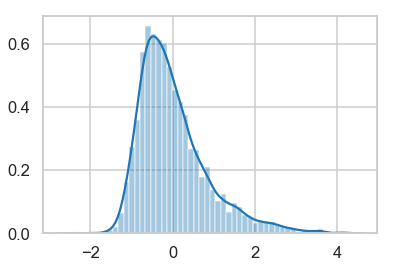

In [115]:
sns.distplot(residuals1)

Homoscedastic testing/The independency of errors:

Text(0.5,1,'Homoscedastic testing')

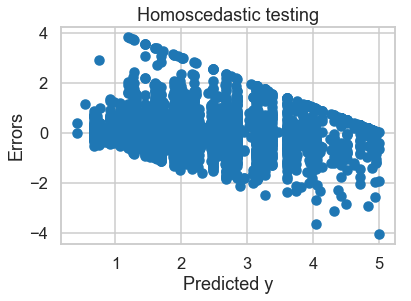

In [116]:
plt.scatter(Dt_pred_test, residuals)
plt.xlabel("Predicted y")
plt.ylabel("Errors")
plt.title("Homoscedastic testing")

Since I choose **DecisionTreeRegressor**, the testing above are not the assumptions. Assumptions are only used when we are testing the linear model. Based on the plot above, the errors looks like are not normally distributed. However, it fits the homoscedastic but it againsts the independency of errors testing. The average of the errors is 0.003 which is very small meaning it is a good sign.

### Q6. Predict the average price of a house in a block with: MedInc of 8.3252, HouseAge=21, AveRooms=8, AveBedrms=2, Population=600, AveOccup=3, Latitude=37.85, Longitude=-122.26.

In [179]:
new_data = np.array([8.3252, 21, 8, 2, 600, 3, 37.85, -122.26]).reshape((1,8))

In [180]:
print("The predictive average price of a house in a block:", dt.predict(new_data))

The predictive average price of a house in a block: [2.408]
